In [1]:
 !pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline



In [3]:
df = pd.read_csv('C:/Users/Acer/Desktop/train_E6oV3lV.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
def patt_remove(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [6]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
df['clean_tweet'] = np.vectorize(patt_remove)(df['tweet'], "@[\w]*")

In [8]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [11]:
tweet_token = df['clean_tweet'].apply(lambda x: x.split())
tweet_token.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [13]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tweet_token = tweet_token.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tweet_token.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [15]:
for i in range(len(tweet_token)):
    tweet_token[i] = " ".join(tweet_token[i])
    
df['clean_tweet'] = tweet_token
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


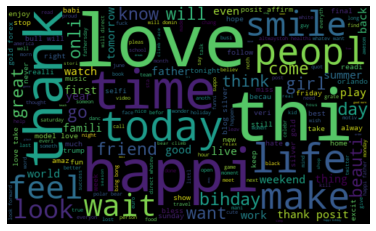

In [16]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=300, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# All sentiment cloudword

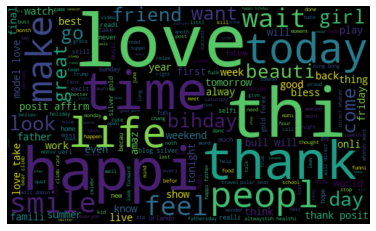

In [17]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=500, height=300, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# +ve sentiment cloudword

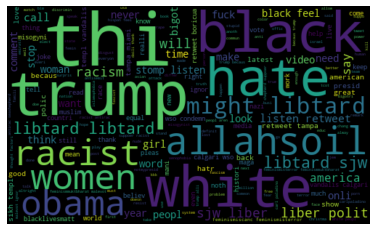

In [18]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=500, height=300, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# -ve sentiment cloudword 

In [19]:
def extract_hash(tweets):
    hashtags = []
    
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [20]:
ht_positive = extract_hash(df['clean_tweet'][df['label']==0])


In [21]:
ht_negative = extract_hash(df['clean_tweet'][df['label']==1])

In [22]:
ht_positive[:5]
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [23]:
freq = nltk.FreqDist(ht_positive)
ll = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
ll.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


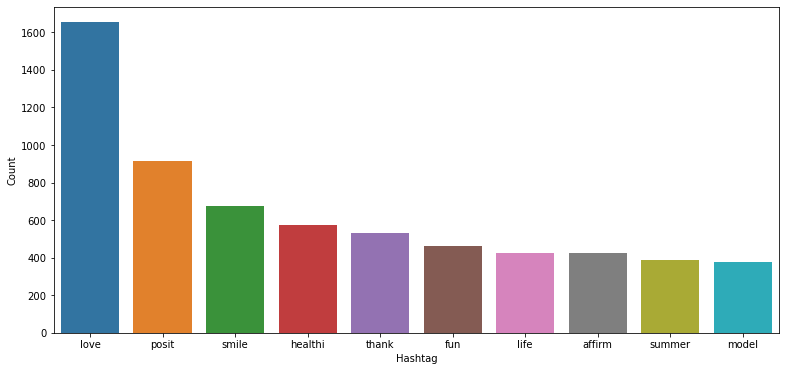

In [25]:
ll = ll.nlargest(columns='Count', n=10)
plt.figure(figsize=(13,6))
sns.barplot(data=ll, x='Hashtag', y='Count')
plt.show()

In [26]:
freq = nltk.FreqDist(ht_negative)
ll = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
ll.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


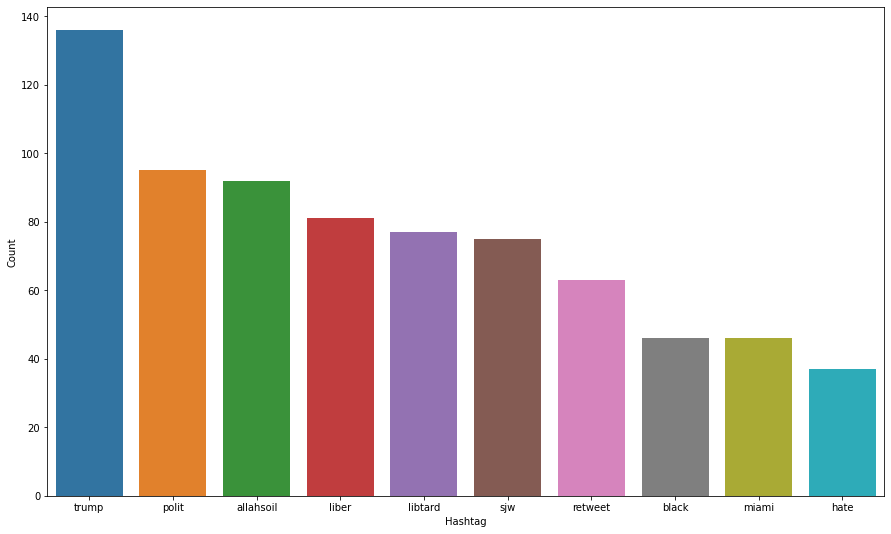

In [28]:
ll = ll.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=ll, x='Hashtag', y='Count')
plt.show()

In [29]:
# Now we will use train test split and model building on logistic regression

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [36]:
accuracy_score(y_test,pred)

0.9469403078463271

In [ ]:
# hence we can see that we obtained a good accuracy of about 94.69%